#**Simple linear Regression**


## Data description:

The dataset has 9 variables, including the name of the car and its various attributes like horsepower, weight, region of origin, etc. Missing values in the data are marked by a series of question marks.

A detailed description of the variables is given below.

1. mpg: miles per gallon
2. cylinders: number of cylinders
3. displacement: engine displacement in cubic inches
4. horsepower: horsepower of the car
5. weight: weight of the car in pounds
6. acceleration: time taken, in seconds, to accelerate from O to 60 mph
7. model year: year of manufacture of the car (modulo 100)
8. origin: region of origin of the car (1 - American, 2 - European, 3 - Asian)
9. car name: name of the car

## Import libraries

In [ ]:
import pandas as pd
import numpy as np

# for visualizing data
import matplotlib.pyplot as plt
import seaborn as sns

# For randomized data splitting
from sklearn.model_selection import train_test_split

# To build linear regression_model
import statsmodels.api as sm

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Load data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ANLY-6100/Module 3/Module-3-assignment/auto-mpg .csv")  # Please complete the code to load the dataset.
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
# Check the shape of the data
df.shape

(398, 9)

In [ ]:
#  check column types and number of values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


## Data Subsetting

In this module we will the linear regression model with one dependent ( Target) and one independent (predictor) variable.

For this purpose, we will take **mpg** as dependent variable and **acceleration** as independent variable.

In [ ]:
df1= df.drop(['cylinders','displacement','horsepower','weight','model year','origin','car name'],axis=1)  # Drop all other columns except for 'mpg' and 'acceleration'
df1.head()            # Check firt five data points

,mpg,acceleration
0,18.0,12.0
1,15.0,11.5
2,18.0,11.0
3,16.0,12.0
4,17.0,10.5


**Visualize the relationship between mpg and cylinders**

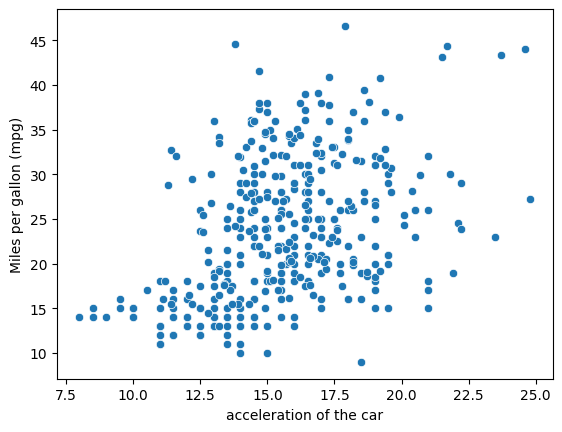

In [ ]:
sns.scatterplot(data=df1,x='acceleration',y='mpg')   # Complete the code with x as 'acceleration' and y as 'mpg'
plt.xlabel('acceleration of the car')
plt.ylabel('Miles per gallon (mpg)')
plt.show()

**We can also fit a linear model using lmplot**

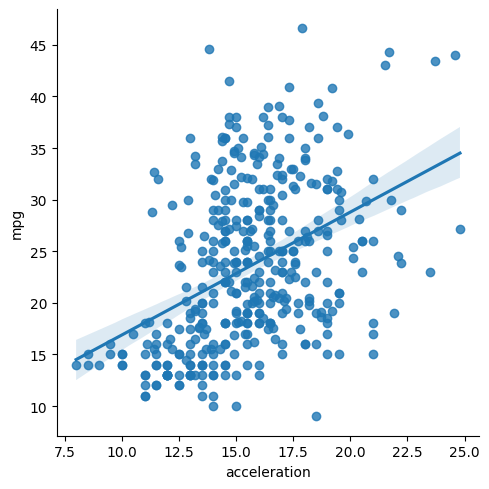

In [ ]:
sns.lmplot(data=df, x='acceleration', y='mpg');

**We saw that these two varaibles are possitively correlated. Let's measure their correlation strength.**



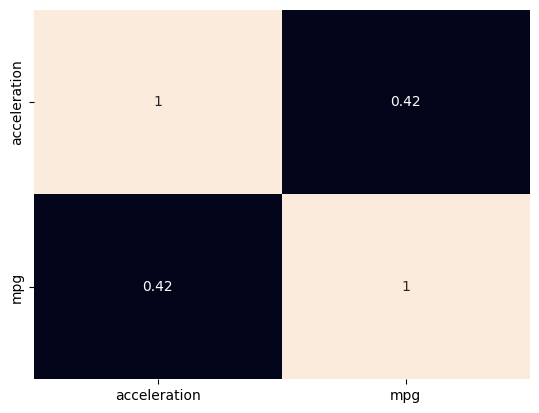

In [ ]:
sns.heatmap(data=df[['acceleration','mpg']].corr(), annot=True, cbar=False);

**These two variables appear to be [have medium correlation] correlated.**
The value is between 0.3 and 0.6

In [ ]:
# Let's check if there are any missing values
df1.isnull().sum()

,0
mpg,0
acceleration,0


**Now, we need to assign one variable as dependent and the other independent variable**

Let's put 'acceleration' in X-axis and 'mpg' in y-axis.

In [ ]:
X= df1['acceleration']
y= df1['mpg']

**We are going to use OLS regression model. This model assumes a regression line passing through the origin unless we add a  constant column**

In [ ]:
# let's add the intercept to data
X = sm.add_constant(X)
X.head()

,const,acceleration
0,1.0,12.0
1,1.0,11.5
2,1.0,11.0
3,1.0,12.0
4,1.0,10.5


**We will now split X and y into train and test sets in a 70:30 ratio. We will use the `train_test_split()` function of sklearn to do the same.**

- sklearn, or Scikit-Learn, is a Python library that offers various features for data processing and modeling tasks
- In order to train a model properly, we need training and test datasets such that the model can be trained using the train data and can be tested on the unseen test data to get a better understandning of how the model is performing.


**Let's Split the data into train and test sets**


In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=1)  # Complete the code with 70:30 split ration and random_state = 1


In [ ]:
print('X_train:')
print(X_train.head())
print('X_test:')
print(X_test.head())
print('y_train:')
print(y_train.head())
print('y_test:')
print(y_test.head())

X_train:
     const  acceleration
350    1.0          14.9
59     1.0          23.5
120    1.0          15.5
12     1.0           9.5
349    1.0          16.0
X_test:
     const  acceleration
174    1.0          14.5
359    1.0          20.4
250    1.0          13.2
274    1.0          15.9
283    1.0          18.2
y_train:
350    34.7
59     23.0
120    19.0
12     15.0
349    34.1
Name: mpg, dtype: float64
y_test:
174    18.0
359    28.1
250    19.4
274    20.3
283    20.2
Name: mpg, dtype: float64


## Fit the Linear model using OLS model

- Statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests and statistical data exploration

- The `OLS()` function of the statsmodels.api module is used to perform OLS (Ordinary Least Squares) regression. It returns an OLS object

- The `fit()` method is called on this object for fitting the regression line to the data

- The `summary()` method is used to obtain a table which gives an extensive description about the regression results
- fitted model.params retruns the model parameters

In [ ]:
olsmod = sm.OLS(y_train, X_train)  # Complete the code to make OLS regression model.
olsres = olsmod.fit()              # Fit the model.

In [ ]:
print(olsres.params)               # Print the model parameters ( constant and slope)
print("****************************")
print("****************************")
print(olsres.summary())            # print the model summary

const           5.806164
acceleration    1.132944
dtype: float64
****************************
****************************
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     52.31
Date:                Thu, 07 Nov 2024   Prob (F-statistic):           4.69e-12
Time:                        01:43:01   Log-Likelihood:                -943.96
No. Observations:                 278   AIC:                             1892.
Df Residuals:                     276   BIC:                             1899.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
------

##Interpreting the Regression Results:


Please interprete the following parameters from your model summary.
1. **Adjusted. R-squared**: 0.156.
This value indicates that there is a bad fit as it is closer to 0 than 1.
This indicates that acceleration alone is not a strong indicator of mpg


2. ***const* coefficient**: 5.8062.
This value indicates the value of the output the constant coefficient if all the predictor value coefficients are set to zero. This indivates the value of mpg if acceleration is zero

3. **Coefficient of a predictor variable**:  1.1329.
This value indicates that the degree of change in the output Y due to a change in the value x. For each  additional unit increase in acceleration, the mpg is epected to increase by 1.1329

## Model Performance Check

Let's check the performance of the model using different metrics.

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
    
* We will create a function which will print out all the above metrics in one go.

In [ ]:
# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsres, X_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,7.218235,5.887614,0.159323,0.153209,27.491949


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsres, X_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,6.767665,5.682014,0.216629,0.203238,26.506632


**Observations:**

Please include the model summary here.

The training R-squared is 0.159, while the test R-squared is 0.217. This suggests the model is not underfitting.

The training RMSE is 7.218, and the testing RMSE is 6.768. Similarly, the training MAE is 5.888, and the testing MAE is 5.682. This implies the model is not overfitting, as it performs comparably on both datasets.

The MAE suggests the model can predict mpg with a mean error of approximately 5.68 on the test data, indicating reasonable accuracy in predicting mpg.

The MAPE of 26.51 on the test data means the model can predict mpg within approximately 26.5% of the actual values, reflecting moderate accuracy in terms of percentage error.

